Взято из официальной документации - https://docs.ultralytics.com/guides/sahi-tiled-inference/#installation

In [1]:
from sahi.utils.yolov8 import download_yolov8x_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image

# Download YOLOv8 model
yolov8_model_path = "models/yolov8x.pt"
download_yolov8x_model(yolov8_model_path)

# Download test images
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [2]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0",
)

# Standard Inference with YOLOv8

In [3]:
%%timeit
# With an image path
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

15 ms ± 391 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# Export and visualize the predicted bounding boxes and masks:
result.export_visuals(export_dir="demo_data/", file_name='prediction_viz_standard')
Image("demo_data/prediction_viz_standard.png")



NameError: name 'result' is not defined

# Sliced Inference with YOLOv8

In [ ]:
%%timeit
# Perform sliced inference by specifying the slice dimensions and overlap ratios:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing prediction on 2 number of slices.
Performing

## Handling Prediction Results

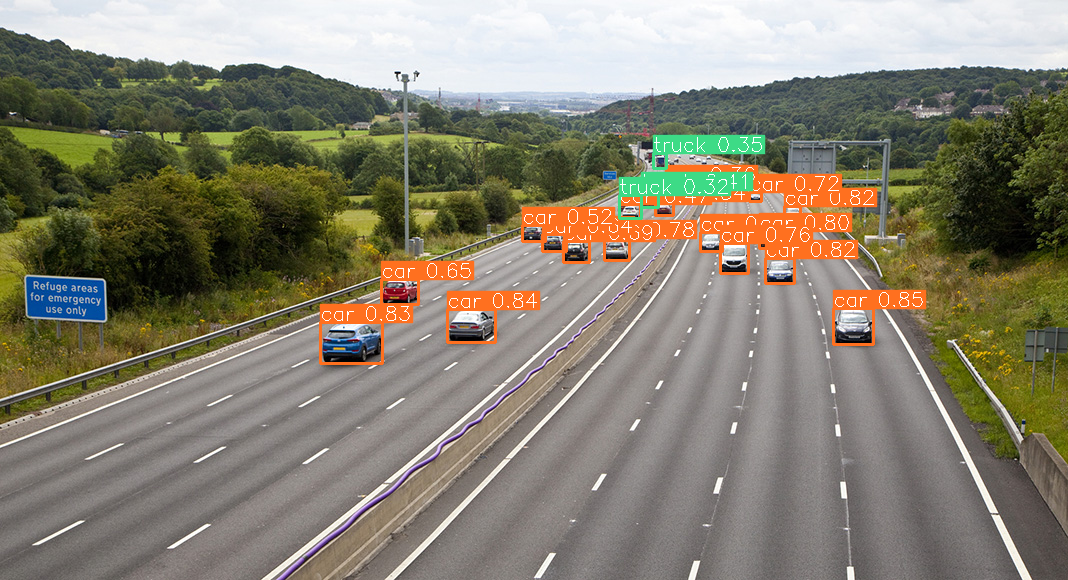

In [ ]:
# Export and visualize the predicted bounding boxes and masks:
result.export_visuals(export_dir="demo_data/", file_name='prediction_viz_slice')
Image("demo_data/prediction_viz_slice.png")